## Creating a Spring-Mass-Damper System Model
A multi-mass system model simulates the behavior of multiple masses interconnected by springs. This type of model is commonly used in physics to understand the dynamics of mechanical systems. In this model, each mass is represented as a node, and the connections between masses are represented by edges, which correspond to the springs.

Multi-Mass System Model in Working:

1. Define the System Parameters:

    - Spring Constants (k1, k2)
    
2. Create a Multi-Mass System Graph:

    - Initialize the Model and Graph
 
    - Define nodes for each mass
    
    - Define edges representing the springs between masses
    

3. Generate a Graph Image:

      - Add edge to the graph
      - Generate the graph image
      

4. Plot:

      - Plot Displacement Over Time
      - Plot Velocities Over Time
      - Plot Accelerations Over Time
     
      

5. Save the Model:

     - Save the model to files in JSON and YAML formats



## Import necessary packages

In [46]:
from modeci_mdf.mdf import *
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters

In [47]:
k1 = 10.0  # spring constant for the first spring (N/m)
k2 = 15.0  # spring constant for the second spring (N/m)

## Creating a Model

In [48]:
# Initialize the Model
multi_mass_model = Model(id="MultiMass_Model")

# Create a Graph within the Model
multi_mass_graph = Graph(id="MultiMass_Graph")
multi_mass_model.graphs.append(multi_mass_graph)

# Define time array

In [49]:
t = np.linspace(0, 10, 100)

# Node for the first mass

In [50]:
mass1_node = Node(id="Mass1_Node")
displacement1 = Parameter(id="displacement1", value=np.sin(2 * np.pi * t))
velocity1 = Parameter(id="velocity1", value=np.gradient(displacement1.value, t))
acceleration1 = Parameter(id="acceleration1", value=np.gradient(velocity1.value, t))
mass1_node.parameters.extend([displacement1, velocity1, acceleration1])

# Node for the second mass

In [51]:
mass2_node = Node(id="Mass2_Node")
displacement2 = Parameter(id="displacement2", value=np.cos(2 * np.pi * t))
velocity2 = Parameter(id="velocity2", value=np.gradient(displacement2.value, t))
acceleration2 = Parameter(id="acceleration2", value=np.gradient(velocity2.value, t))
mass2_node.parameters.extend([displacement2, velocity2, acceleration2])

# Node for the third mass

In [52]:
mass3_node = Node(id="Mass3_Node")
displacement3 = Parameter(id="displacement3", value=np.sin(2 * np.pi * t + np.pi/4))
velocity3 = Parameter(id="velocity3", value=np.gradient(displacement3.value, t))
acceleration3 = Parameter(id="acceleration3", value=np.gradient(velocity3.value, t))
mass3_node.parameters.extend([displacement3, velocity3, acceleration3])

# Add nodes to the graph

In [53]:
multi_mass_graph.nodes.extend([mass1_node, mass2_node, mass3_node])

# Define edges representing the springs between masses

In [54]:
spring1_edge = Edge(id="spring1_edge", sender=mass1_node.id, receiver=mass2_node.id, sender_port="displacement1", receiver_port="displacement2")
spring2_edge = Edge(id="spring2_edge", sender=mass2_node.id, receiver=mass3_node.id, sender_port="displacement2", receiver_port="displacement3")

# Add edges to the graph

In [55]:
multi_mass_graph.edges.extend([spring1_edge, spring2_edge])

# Generate a graph image

Converting MDF graph: MultiMass_Graph to graphviz (level: 2, format: png)
    Node: Mass1_Node
    Node: Mass2_Node
    Node: Mass3_Node
    Edge: spring1_edge connects Mass1_Node to Mass2_Node
    Edge: spring2_edge connects Mass2_Node to Mass3_Node
Written graph image to: MultiMassSystem.png


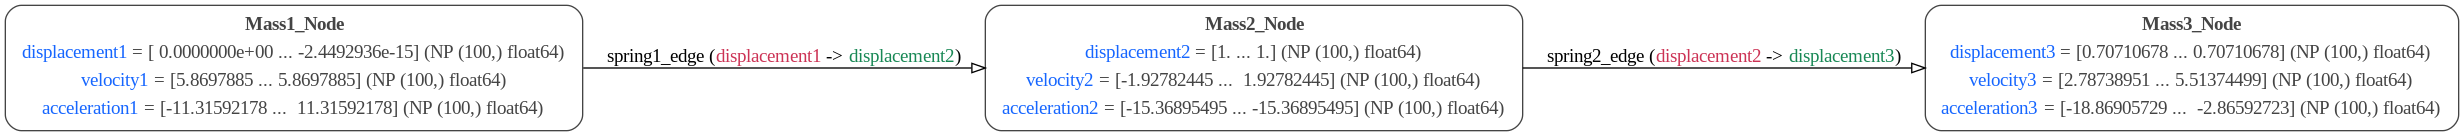

In [56]:
from IPython.display import Image

multi_mass_model.to_graph_image(engine="dot", output_format="png", filename_root="MultiMassSystem", is_horizontal=True)

from IPython.display import Image
Image(filename="MultiMassSystem.png")

# Plotting the displacements over time

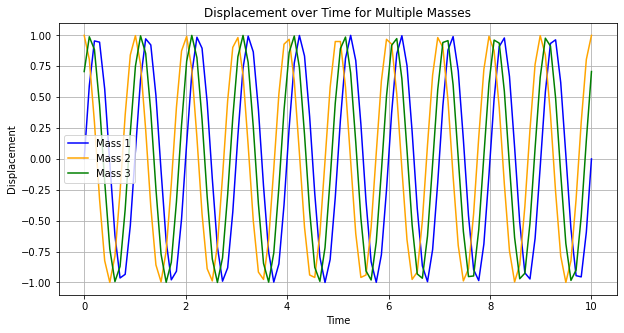

In [57]:
# Plotting the displacements over time
plt.figure(figsize=(10, 5))
plt.plot(t, displacement1.value, label='Mass 1', color='blue')
plt.plot(t, displacement2.value, label='Mass 2', color='orange')
plt.plot(t, displacement3.value, label='Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()




# Plotting the velocities over time

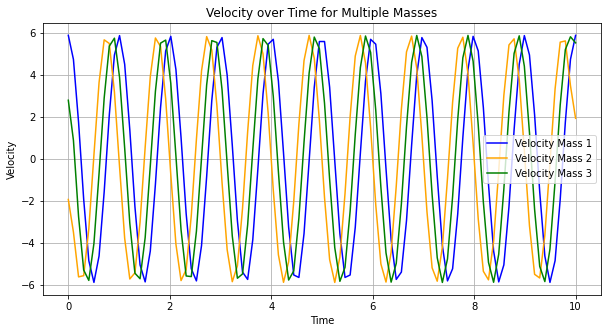

In [58]:
# Plotting the velocities over time
plt.figure(figsize=(10, 5))
plt.plot(t, velocity1.value, label='Velocity Mass 1', color='blue')
plt.plot(t, velocity2.value, label='Velocity Mass 2', color='orange')
plt.plot(t, velocity3.value, label='Velocity Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the accelerations over time

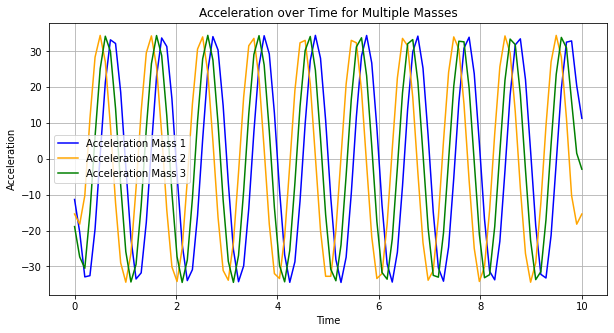

In [59]:
# Plotting the accelerations over time
plt.figure(figsize=(10, 5))
plt.plot(t, acceleration1.value, label='Acceleration Mass 1', color='blue')
plt.plot(t, acceleration2.value, label='Acceleration Mass 2', color='orange')
plt.plot(t, acceleration3.value, label='Acceleration Mass 3', color='green')
plt.xlabel('Time')
plt.ylabel('Acceleration')
plt.title('Acceleration over Time for Multiple Masses')
plt.legend()
plt.grid(True)
plt.show()

# Save the model to files in JSON and YAML formats

In [60]:
j_file = "%s.json" % multi_mass_model.id
multi_mass_model.to_json_file(j_file)
print("Saved to %s" % j_file)

y_file = "%s.yaml" % multi_mass_model.id
multi_mass_model.to_yaml_file(y_file)
print("Saved to %s" % y_file)

Saved to MultiMass_Model.json
Saved to MultiMass_Model.yaml
